In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
%matplotlib inline

In [567]:
# Grab and process the raw data.
data_path = '/root/Downloads/sentiment/sentances/yelp_labelled.txt'
            
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['review', 'positive']

## Classification Model
### Build a model using yelp reviews

In [568]:
df.head()

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [569]:
# the punctuation is difficult to capture reviews that end positively
df['review'] = df['review'].str.replace('.', ' ')
df.head()

,review,positive
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [570]:
#choose keywords as features for positive
keywords = ['great', 
            'love', 
            'mother',
            'top',
            'away',
            'amazing',
            'prompt',
            'delicious',
            'best',
            'beautiful',
            'wow', 
            'wonderful',
            'good',
            'reasonably',
            'value',
            'quickly',
            'satisfied',
            'fast',
            'happy',
            'comfort',
            'nice',
            'pleased',
            'perfect',
            'impressed',
            'excellent',
            'fantastic',
            'durable',
            'recommend',
            'brilliant',
            'enjoyed',
            'liked',
            'to die for']

#Capture both the word, plus if its in a pattern


for key in keywords:
    df[str(key)] = df.review.str.contains(
        '' + str(key) + '',
        case=False
    )

In [571]:
#turn binary 'positive' to boolean T/F
df['positive'] = (df['positive'] == 1)

In [572]:
df.head(1)

,review,positive,great,love,mother,top,away,amazing,prompt,delicious,...,perfect,impressed,excellent,fantastic,durable,recommend,brilliant,enjoyed,liked,to die for
0,Wow Loved this place,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


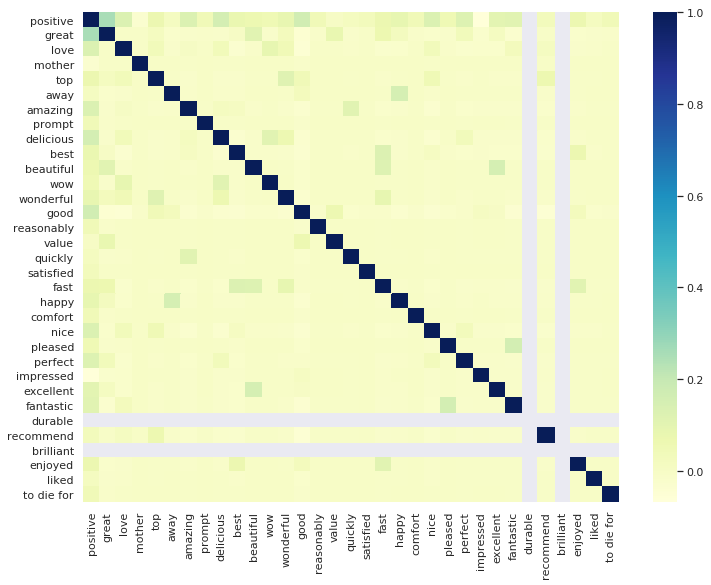

In [573]:
#Creat heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

Most of the variables seem to be independent. Some small correlations but enough independence

In [574]:
#check instances of features
for col in df.loc[:,'great':'to die for']:
    df1=pd.DataFrame(columns=df.columns)
    for col in df1.loc[:,'great':'to die for']:
        df1[col]= df[col].value_counts()
    
df1.head()

,review,positive,great,love,mother,top,away,amazing,prompt,delicious,...,perfect,impressed,excellent,fantastic,durable,recommend,brilliant,enjoyed,liked,to die for
False,NaN,NaN,935,964,999,991,995,976,998,976,...,985,992,990,988,1000.0,982,1000.0,995,997,998
True,NaN,NaN,65,36,1,9,5,24,2,24,...,15,8,10,12,NaN,18,NaN,5,3,2


In [575]:
data = df[keywords]
target = df['positive']

In [576]:
#As the outcome is categorical we use naive bayes to fit the model. More specifically,
#the out come is binary so we choose the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 245


After compiling the list of keywords, the model can predict at around 75%

In [577]:
#Try another distribution
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data, target)
y_pred = gnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 344


The Bernoulli results are better, not surprisingly.

In [578]:
#and another
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(data, target)

y_pred = mnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 309


Overall, the Bernoulli had the best results, this isnt suprising as the outcome data in binary.  We can apply this model to other data sets with binary outcomes

## IMDB reviews

In [579]:
# Grab and process the raw data.
imdb_path = '/root/Downloads/sentiment/sentances/imdb_labelled.txt'
            
imdb = pd.read_csv(imdb_path, delimiter= '\t', header=None)
imdb.columns = ['review', 'positive']
imdb['review'] = imdb['review'].str.replace('.', ' ')

imdb['positive'] = (imdb['positive'] == 1)


In [580]:
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        '' + str(key) + '',
        case=False
    )

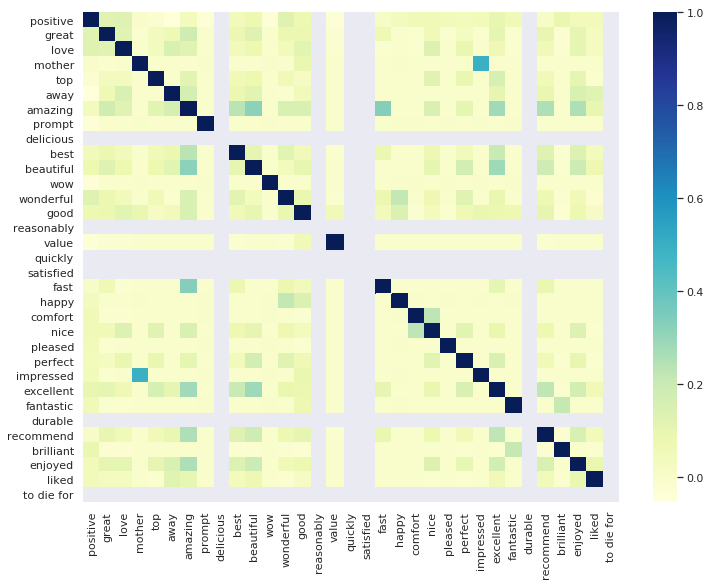

In [581]:
#Creat heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(imdb.corr(), cmap='YlGnBu')
plt.show()

The heatmap show some highly correlated variable, particularly 'mother' and 'impressed'. We will leave it how it is for the moment

In [582]:
data = imdb[keywords]
target = imdb['positive']

In [583]:
bnb.fit(data,target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 748 points : 256


## Amazon product reviews

In [584]:
az_path = '/root/Downloads/sentiment/sentances/amazon_cells_labelled.txt'

azprod = pd.read_csv(az_path, delimiter='\t', header=None)
azprod.columns = ['review','positive']
azprod['review'] = azprod['review'].str.replace('.', ' ')
azprod['positive'] = (azprod['positive'] == 1)
azprod.head(1)

,review,positive
0,So there is no way for me to plug it in here i...,False


In [585]:
for key in keywords:
    azprod[str(key)] = azprod.review.str.contains(
    "" + str(key)+"", case=False)

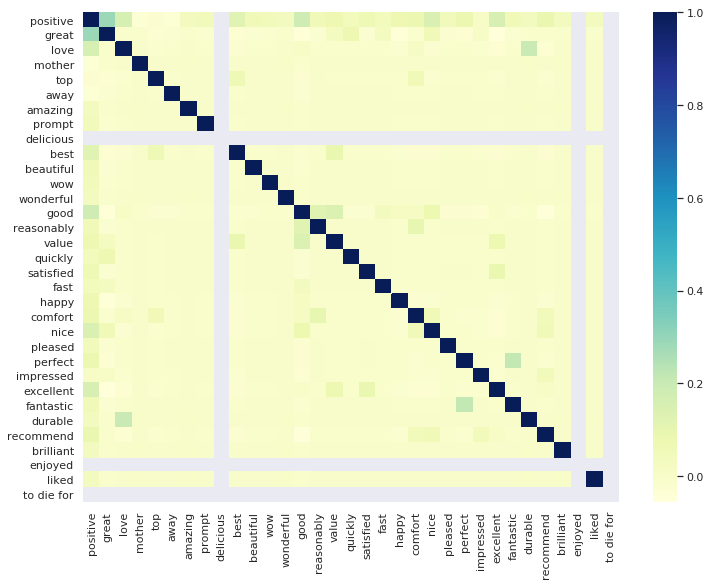

In [586]:
plt.figure(figsize=(12,9))
sns.heatmap(azprod.corr(), cmap='YlGnBu')
plt.show()

In [587]:
data = azprod[keywords]
target = azprod['positive']

In [588]:
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 240


For this data, the Bernoulli classifier was the best choice. It out performed the others.
Again, this is not surprising as our outcome data was binary.
To engineer the features, I thought of words that people use as positive descriptors. Since i knew that we needed to apply the model to other data sets, I included keywords that didn't necessarily only apply to restaurants. Some of the keywords showed slight correlation, but the only concerning correlation was between 'mother' and 'impressed'.